### ORIE 6750 Homework 4 Question 2
Simulating the knowledge gradient policy

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad


In [10]:
def compute_Q(mu, h, best_mu):
    beta = (h+1)/(h+2)
    ystar = (best_mu - beta*mu)/(1-beta)
    
    integrand = lambda theta, mu, h, best_mu, beta, ystar: \
                    (norm.cdf(ystar-theta)*(best_mu-beta*mu-(1-beta)*(theta+1)) +\
                    beta*mu + (1-beta)*(theta+1)) *\
                    np.sqrt((h+1)/(2*np.pi)) * np.exp(-(theta-mu)**2*(h+1)/2)
    
    integral = quad(integrand, -np.inf, np.inf, args = (mu,h,best_mu,beta,ystar))[0]

    return integral

In [101]:
# define function for computing Q-factor

def value_KG(H, K, n_iter):
    
    best_mu_record = np.zeros(n_iter)
    
    for ind_iter in range(n_iter):
    
        B = np.zeros((K,2))
        theta = np.random.normal(0,1,K)

        best_mu=0
        #best_mu_record=[]
        #pull_record=[]

        for n in range(1,H+1):

            Q = np.zeros(K)
            for k in range(K):
                # compute Q-factor given by knowledge gradient
                if k == pull:
                    Q[k] = compute_Q(B[k,0], B[k,1], best_mu)
                else:
                    Q[k] = Q_cache[k]
            
            Q_cache = Q
            
            pull = np.argmax(Q)
            #pull_record.append(pull)

            Y = np.random.normal(theta[pull], 1)
            beta_pull = (B[pull,1]+1) / (B[pull,1]+2)
            B[pull,0] = B[pull,0]*beta_pull + (1-beta_pull)*Y
            B[pull,1] += 1

            best_mu = np.amax(B[:,0])
        
        #print(ind_iter)
        #print(best_mu)
        best_mu_record[ind_iter] = best_mu

    
    return np.mean(best_mu_record)

In [90]:
values = np.zeros(10)

for h in range(10):
    H=h+1
    print('Simulating for horizon = '+str(H))
    values[h] = value_KG(H, 2, 1000)

Simulating for horizon = 1
Simulating for horizon = 2
Simulating for horizon = 3
Simulating for horizon = 4
Simulating for horizon = 5
Simulating for horizon = 6
Simulating for horizon = 7
Simulating for horizon = 8
Simulating for horizon = 9
Simulating for horizon = 10


In [92]:
# copy values computed in question 1: bellman iteration and simulation of optimal policy

values_bellman_sim = np.array([[0.49483695, 0.29698544],
       [0.67627377, 0.40182158],
       [0.7105858 , 0.43268482],
       [0.73394914, 0.44610925],
       [0.74485106, 0.46867454],
       [0.7519399 , 0.51265452],
       [0.75631845, 0.49909573],
       [0.75926993, 0.45809755],
       [0.76127031, 0.54079015],
       [0.76266791, 0.4903737 ]])

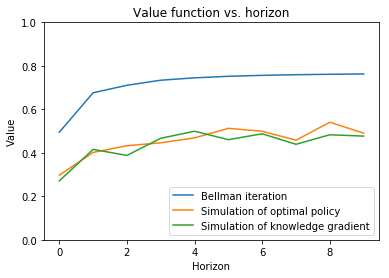

In [100]:
plt.plot(values_bellman_sim[:,0], label='Bellman iteration')
plt.plot(values_bellman_sim[:,1], label='Simulation of optimal policy')
plt.plot(values, label='Simulation of knowledge gradient')
plt.ylim(0,1)
plt.xlabel('Horizon')
plt.ylabel('Value')
plt.title('Value function vs. horizon')
plt.legend(loc='lower right')